In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Part 1 - Setup
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

DATA_PATH = "/content/drive/MyDrive/msc_final_dataset/final_with_polarity_sbert.csv"
EMB_PATH = "/content/drive/MyDrive/msc_final_dataset/embeddings/sbert_embeddings.npy"
TERMS_PATH = "/content/drive/MyDrive/msc_final_dataset/embeddings/cluster_top_terms.json"

df = pd.read_csv(DATA_PATH)
print("Dataset loaded:", df.shape)

# Load embeddings + top terms stats
E_text = np.load(EMB_PATH)
with open(TERMS_PATH, "r") as f:
    top_terms = json.load(f)

print("Embeddings:", E_text.shape)
print("Clusters:", len(top_terms))


Dataset loaded: (5966, 18)
Embeddings: (5966, 384)
Clusters: 8


In [ ]:
# Part 2 - Display Cluster summary table (stats-size-polarity)

summary = []
for c, terms in top_terms.items():
    cluster_df = df[df["Cluster_SBERT_k8"] == int(c)]
    size = len(cluster_df)

    polarity_counts = cluster_df["Polarity_Label"].value_counts(normalize=True).to_dict()
    polarity_str = ", ".join([f"{k}: {v:.2f}" for k,v in polarity_counts.items()])

    summary.append({
        "Cluster": c,
        "Size": size,
        "Top_Terms": ", ".join(terms[:8]),
        "Polarity_Distribution": polarity_str
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

# Save !!
summary_df.to_csv("/content/drive/MyDrive/msc_final_dataset/cluster_summary.csv", index=False)

  Cluster  Size                                          Top_Terms  \
0       0   888            the, it, to, my, on, http, twitter, for   
1       1  1395                 you, the, to, me, it, that, my, is   
2       2   157  day, happy, mother, mothers, mother day, happy...   
3       3   437                  and, to, he, my, the, me, it, she   
4       4   796           the, to, and, it, is, on, watching, that   
5       5   899                 to, the, you, in, it, and, my, for   
6       6   644                 my, the, and, to, it, of, is, just   
7       7   750     to, work, and, morning, today, day, the, sleep   

                           Polarity_Distribution  
0  Positive: 0.44, Neutral: 0.30, Negative: 0.26  
1  Positive: 0.44, Neutral: 0.31, Negative: 0.25  
2  Positive: 0.90, Neutral: 0.09, Negative: 0.01  
3  Positive: 0.59, Negative: 0.40, Neutral: 0.01  
4  Positive: 0.53, Negative: 0.26, Neutral: 0.21  
5  Positive: 0.59, Neutral: 0.23, Negative: 0.18  
6  Positive:

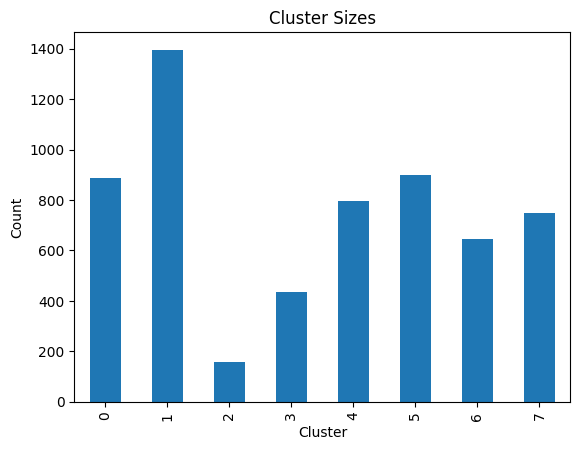

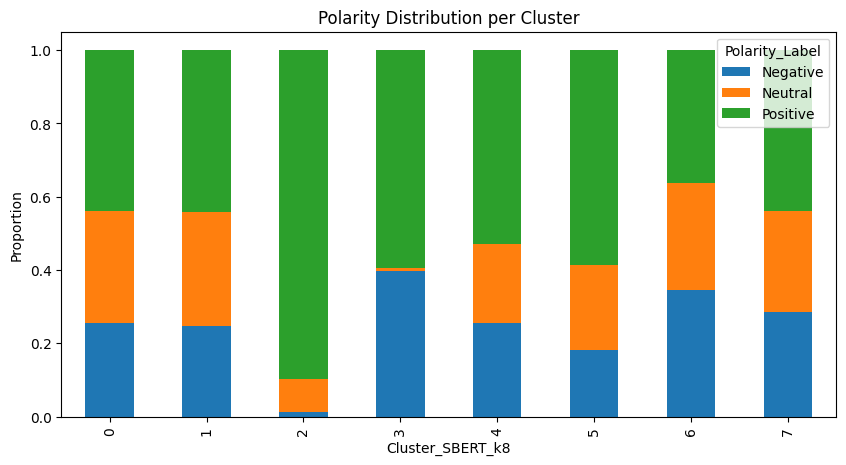

In [ ]:
# Part 3 - Plot graphs/visual analysis (cluster sizes and polarity)

# Cluster sizes
df["Cluster_SBERT_k8"].value_counts().sort_index().plot(kind="bar", title="Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Polarity by cluster
pd.crosstab(df["Cluster_SBERT_k8"], df["Polarity_Label"], normalize="index").plot(
    kind="bar", stacked=True, title="Polarity Distribution per Cluster", figsize=(10,5)
)
plt.ylabel("Proportion")
plt.show()

In [ ]:
# Part 4 - Emotion mapping - Plutchik Lexicon Mapping (placeholds)

# mapping trigger words = emotions

plutchik_lexicon = {
    "joy": ["happy", "joy", "smile", "love", "excited"],
    "sadness": ["sad", "cry", "lonely", "miss", "depressed"],
    "anger": ["angry", "hate", "mad", "annoyed"],
    "fear": ["scared", "afraid", "anxious", "worry"],
    "trust": ["trust", "secure", "safe", "believe"],
    "disgust": ["disgust", "gross", "ew", "nasty"],
    "surprise": ["surprised", "wow", "unexpected"],
    "anticipation": ["waiting", "hope", "soon", "expect"]
}
